In [10]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB
import numpy as np
import pandas as pd
import my_globals
import pickle
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [3]:
data = pd.read_csv('feature_space_1.csv', encoding='latin1')
y = data['target']
data = data.drop('target', axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

In [5]:
data.head(5)

,exclaim_freq,mention_count,cap_freq,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weekday_Sun,...,tfidf_àª,tfidf_à¹,tfidf_ðµ,tfidf_ðµð,tfidf_ðµñ,tfidf_ðºð,tfidf_ð½ð,tfidf_ð¾,tfidf_ð¾ð,tfidf_ð¾ñ
0,0.016667,1,0.054054,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,1,0.346154,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.023256,2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.018182,1,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,1,0.200000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
lg = LogisticRegression(max_iter=1000)

params={
    "penalty": [None, "l2"],
    'C': [10**(n) for n in range(0, 3)]
}

clf = GridSearchCV(lg, params, scoring='accuracy', cv=5, return_train_score=True, verbose=4)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .C=1, penalty=None;, score=(train=nan, test=nan) total time=   1.4s
[CV 2/5] END .C=1, penalty=None;, score=(train=nan, test=nan) total time=   1.0s
[CV 3/5] END .C=1, penalty=None;, score=(train=nan, test=nan) total time=   1.0s
[CV 4/5] END .C=1, penalty=None;, score=(train=nan, test=nan) total time=   0.9s
[CV 5/5] END .C=1, penalty=None;, score=(train=nan, test=nan) total time=   0.8s
[CV 1/5] END C=1, penalty=l2;, score=(train=0.798, test=0.765) total time= 1.0min
[CV 2/5] END C=1, penalty=l2;, score=(train=0.797, test=0.769) total time=  51.6s
[CV 3/5] END C=1, penalty=l2;, score=(train=0.797, test=0.772) total time=  51.3s
[CV 4/5] END C=1, penalty=l2;, score=(train=0.798, test=0.764) total time=  51.4s
[CV 5/5] END C=1, penalty=l2;, score=(train=0.796, test=0.770) total time=  52.3s
[CV 1/5] END C=10, penalty=None;, score=(train=nan, test=nan) total time=   0.9s
[CV 2/5] END C=10, penalty=None;, score=(tra

C:\Users\hisky\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hisky\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hisky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\hisky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 441, in _check_solver
    raise ValueError(
Valu

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1, 10, 100], 'penalty': [None, 'l2']},
             return_train_score=True, scoring='accuracy', verbose=4)

In [8]:
def assess(y_true, y_pred):
    print("confusion matrix:")
    print(confusion_matrix(y_true, y_pred))
    print()
    print("accuracy_score:")
    print(accuracy_score(y_true, y_pred))
    print()
    print("classification report:")
    print(classification_report(y_true,y_pred))
    print()


best_c = clf.best_params_["C"]
print(f"Best C choice is {best_c}.")
best_lg = clf.best_estimator_

lg_modelfile = "/".join([my_globals.DATA_DIR, "best_lg.pickle"])
pickle.dump(best_lg, open(lg_modelfile, "wb"))

best_lg.fit(X_train, y_train)
y_pred = best_lg.predict(X_test)

print("Out of sample assessment:")
print()
assess(y_test, y_pred)

Best C choice is 1.
Out of sample assessment:

confusion matrix:
[[7449 2460]
 [2158 7933]]

accuracy_score:
0.7691

classification report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      9909
           4       0.76      0.79      0.77     10091

    accuracy                           0.77     20000
   macro avg       0.77      0.77      0.77     20000
weighted avg       0.77      0.77      0.77     20000




<AxesSubplot:>

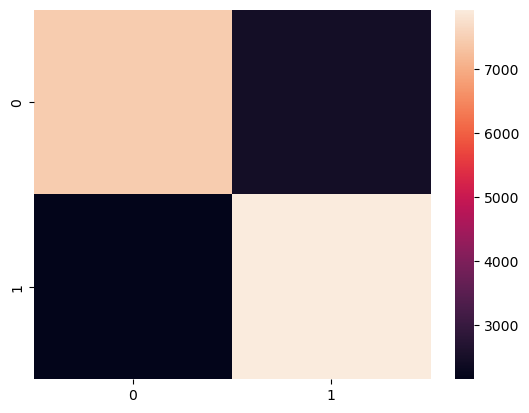

In [13]:
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat)